# 환경 세팅

## 한글폰트 설치 (런타임 재시작 필요)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

## lightgbm 버전 다운그레이드 (런타임 재시작 필요)
- lightgbm 3.3.2 버전

In [ ]:
!pip install lightgbm==3.3.2

## XGBOOST 설치

In [ ]:
!pip install xgboost

## Graphviz 설치

In [ ]:
!pip install graphviz

## 런타임 재시작 후 설치 확인

In [ ]:
import lightgbm
lightgbm.__version__

'3.3.2'

In [ ]:
import xgboost
xgboost.__version__

'1.7.6'

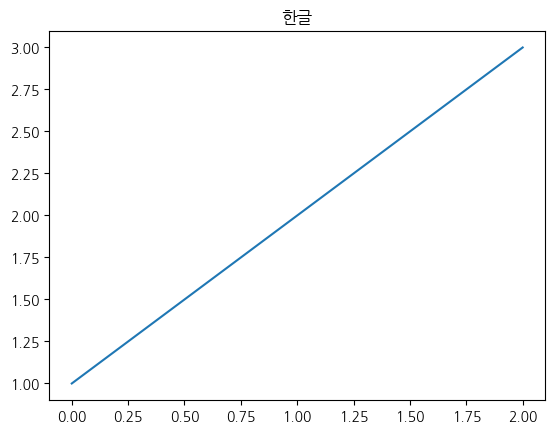

In [ ]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

## 구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
DATA_PATH = '/content/drive/MyDrive/세미프로젝트/학습완료모델/'

# 모델 개요 시각화

In [ ]:
# 마이너스 부호 깨짐 해결
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

## RandomForestRegressor

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree  # plot_tree 함수를 import
import joblib
%matplotlib inline

# 저장된 모델 파일을 불러옵니다.
pipeline = joblib.load(DATA_PATH + 'RandomForestRegressor/RF_reg_num1.pkl')
model = pipeline.named_steps['RF_reg']

# 특정 트리 번호를 선택하여 시각화
tree_number = 0  # 원하는 트리 번호 선택
tree = model.estimators_[tree_number]

# 트리 시각화
plt.figure(figsize=(400, 100))
plot_tree(tree, filled=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

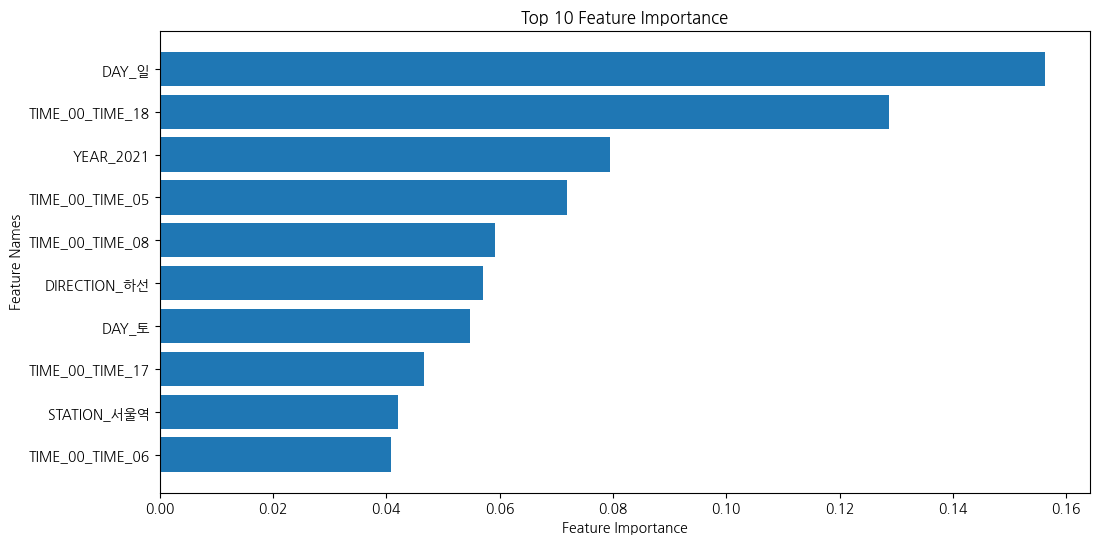

In [ ]:
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

# .pkl 파일로부터 파이프라인 객체를 로드합니다.
loaded_pipeline = joblib.load(DATA_PATH + 'RandomForestRegressor/RF_reg_num1.pkl')

# 파이프라인에서 모델을 추출합니다.
loaded_model = loaded_pipeline.named_steps['RF_reg']

# 모델에서 feature importance를 가져옵니다.
feature_importance = loaded_model.feature_importances_

# OneHot 인코딩을 사용한 경우, 칼럼명을 추출합니다.
column_transformer = loaded_pipeline.named_steps['preprocessor']
onehot_columns = list(column_transformer.named_transformers_['cat'].get_feature_names_out(input_features=['YEAR', 'MONTH', 'DAY', 'STATION', 'DIRECTION', 'TIME_00']))
all_columns = onehot_columns  # OneHot 인코딩 칼럼명

# 특성 중요도와 칼럼명을 연결합니다.
feature_importance_with_names = list(zip(all_columns, feature_importance))

# 특성 중요도를 중요도 값으로 정렬합니다.
feature_importance_with_names.sort(key=lambda x: x[1], reverse=True)

# 상위 N개의 중요한 특성만 선택
top_n = 10  # 상위 10개 특성을 표시하도록 설정
top_features = feature_importance_with_names[:top_n]

# 중요한 특성과 중요도를 시각화합니다.
top_feature_names, top_feature_importance = zip(*top_features)
plt.figure(figsize=(12, 6))
plt.barh(top_feature_names, top_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Top {} Feature Importance'.format(top_n))
plt.gca().invert_yaxis()  # 중요도가 높은 순서대로 표시하기 위해 y-축 뒤집기
plt.show()

In [ ]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# .pkl 파일로부터 파이프라인 객체를 로드합니다.
loaded_pipeline = joblib.load(DATA_PATH + 'RandomForestRegressor/RF_reg_num1.pkl')

# 파이프라인에서 모델을 추출합니다.
loaded_model = loaded_pipeline.named_steps['RF_reg']

# 모델에서 feature importance를 가져옵니다.
feature_importance = loaded_model.feature_importances_

# OneHot 인코딩을 사용한 경우, 칼럼명을 추출합니다.
column_transformer = loaded_pipeline.named_steps['preprocessor']
onehot_columns = list(column_transformer.named_transformers_['cat'].get_feature_names_out(input_features=['YEAR', 'MONTH', 'DAY', 'STATION', 'DIRECTION', 'TIME_00']))
all_columns = onehot_columns  # OneHot 인코딩 칼럼명

# 특성 중요도와 칼럼명을 연결합니다.
feature_importance_with_names = list(zip(all_columns, feature_importance))

# 특성 중요도를 중요도 값으로 정렬합니다.
feature_importance_with_names.sort(key=lambda x: x[1], reverse=True)

# 상위 N개의 중요한 특성만 선택
top_n = 10  # 상위 10개 특성을 표시하도록 설정
top_features = feature_importance_with_names[:top_n]

# 중요한 특성과 중요도를 데이터프레임으로 만듭니다.
import pandas as pd
df = pd.DataFrame(top_features, columns=['Feature', 'Feature Importance'])

# Seaborn을 사용하여 중요한 특성을 가로 막대 그래프로 시각화합니다.
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature Importance', y='Feature', data=df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Top {} Feature Importance'.format(top_n))
plt.gca().invert_yaxis()  # 중요도가 높은 순서대로 표시하기 위해 y-축 뒤집기
plt.show()


## LinearRegression

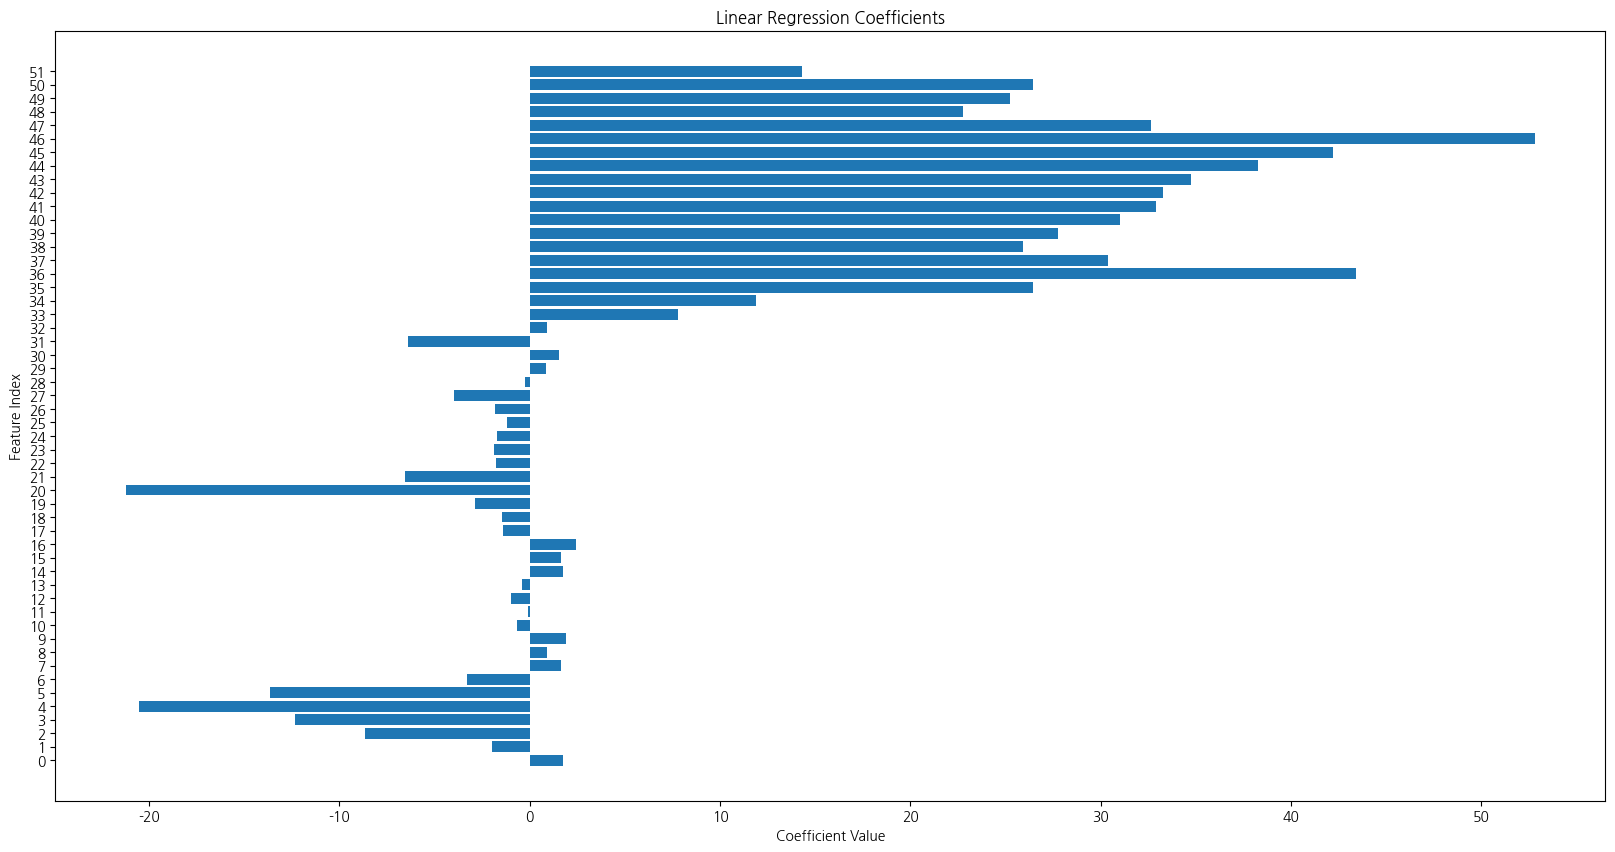

In [ ]:
import matplotlib.pyplot as plt
import joblib
%matplotlib inline

# 저장된 모델 파일을 불러옵니다.
pipeline = joblib.load(DATA_PATH + 'LinearRegression/Lin_reg_num1.pkl')
model = pipeline.named_steps['Lin_reg']

# 회귀 계수(coefficients)를 얻습니다.
coefficients = model.coef_

# 각 특성의 중요도(계수)를 시각화합니다.
plt.figure(figsize=(20, 10))
plt.barh(range(len(coefficients)), coefficients)
plt.yticks(range(len(coefficients)), range(len(coefficients)))  # 특성 이름이 없으므로 숫자 레이블을 사용
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Index')
plt.title('Linear Regression Coefficients')
plt.show()

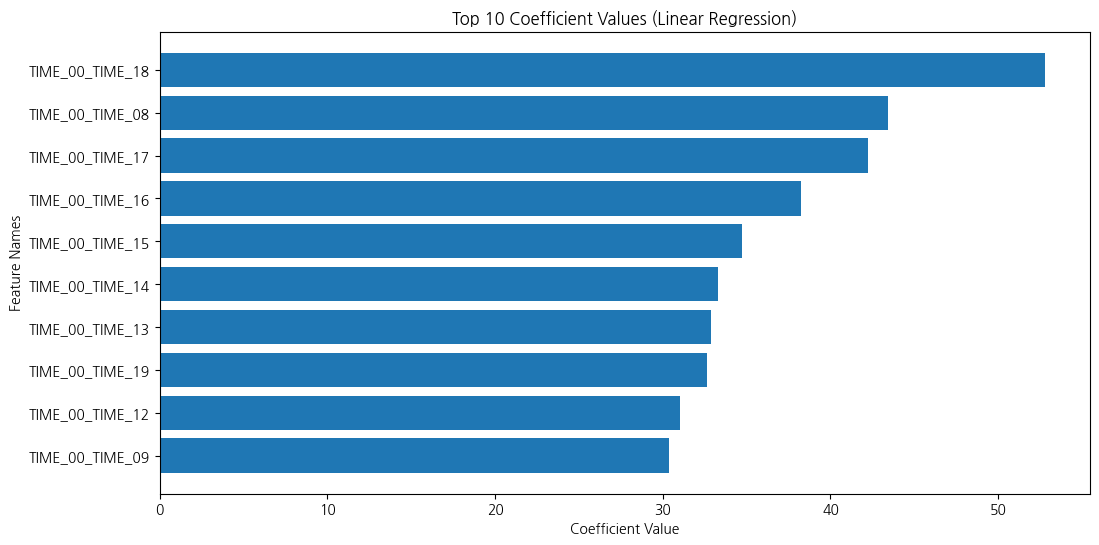

In [ ]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# .pkl 파일로부터 파이프라인 객체를 로드합니다.
loaded_pipeline = joblib.load(DATA_PATH + 'LinearRegression/Lin_reg_num1.pkl')

# 파이프라인에서 모델을 추출합니다.
loaded_model = loaded_pipeline.named_steps['Lin_reg']

# 회귀 계수(coefficients)를 얻습니다.
coefficients = loaded_model.coef_

# 칼럼명을 추출합니다.
column_transformer = loaded_pipeline.named_steps['preprocessor']
onehot_columns = list(column_transformer.named_transformers_['cat'].get_feature_names_out(input_features=['YEAR', 'MONTH', 'DAY', 'STATION', 'DIRECTION', 'TIME_00']))

# 특성 중요도와 칼럼명을 연결합니다.
feature_importance_with_names = list(zip(onehot_columns, coefficients))

# 회귀 계수를 중요도 값으로 정렬합니다.
feature_importance_with_names.sort(key=lambda x: abs(x[1]), reverse=True)

# 상위 N개의 중요한 특성만 선택
top_n = 10  # 상위 10개 특성을 표시하도록 설정
top_features = feature_importance_with_names[:top_n]

# 중요한 특성과 중요도를 시각화합니다.
top_feature_names, top_feature_importance = zip(*top_features)
plt.figure(figsize=(12, 6))
plt.barh(top_feature_names, top_feature_importance)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Names')
plt.title('Top {} Coefficient Values (Linear Regression)'.format(top_n))
plt.gca().invert_yaxis()  # 중요도가 높은 순서대로 표시하기 위해 y-축 뒤집기
plt.show()

In [ ]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# .pkl 파일로부터 파이프라인 객체를 로드합니다.
loaded_pipeline = joblib.load(DATA_PATH + 'LinearRegression/Lin_reg_num1.pkl')

# 파이프라인에서 모델을 추출합니다.
loaded_model = loaded_pipeline.named_steps['Lin_reg']

# 회귀 계수(coefficients)를 얻습니다.
coefficients = loaded_model.coef_

# 칼럼명을 추출합니다.
column_transformer = loaded_pipeline.named_steps['preprocessor']
onehot_columns = list(column_transformer.named_transformers_['cat'].get_feature_names_out(input_features=['YEAR', 'MONTH', 'DAY', 'STATION', 'DIRECTION', 'TIME_00']))

# 특성 중요도와 칼럼명을 연결합니다.
feature_importance_with_names = list(zip(onehot_columns, coefficients))

# 회귀 계수를 중요도 값으로 정렬합니다.
feature_importance_with_names.sort(key=lambda x: abs(x[1]), reverse=True)

# 상위 N개의 중요한 특성만 선택
top_n = 10  # 상위 10개 특성을 표시하도록 설정
top_features = feature_importance_with_names[:top_n]

# 중요한 특성과 중요도를 데이터프레임으로 만듭니다.
import pandas as pd
df = pd.DataFrame(top_features, columns=['Feature', 'Coefficient'])

# Seaborn을 사용하여 중요한 특성을 가로 막대 그래프로 시각화합니다.
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=df)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Names')
plt.title('Top {} Coefficient Values (Linear Regression)'.format(top_n))
plt.gca().invert_yaxis()  # 중요도가 높은 순서대로 표시하기 위해 y-축 뒤집기
plt.show()

## LGBMRegressor

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import joblib
%matplotlib inline

# 저장된 모델 파일을 불러옵니다.
pipeline = joblib.load(DATA_PATH + 'LGBMRegressor/LGB_reg_num1.pkl')
model = pipeline.named_steps['LGB_reg']

# 특정 트리 번호를 선택하여 시각화
tree_number = 0  # 원하는 트리 번호 선택


fig, ax = plt.subplots(figsize=(500, 100))
lgb.plot_tree(model, tree_index=tree_number, figsize=(20, 10), show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count'], ax=ax)
plt.show()

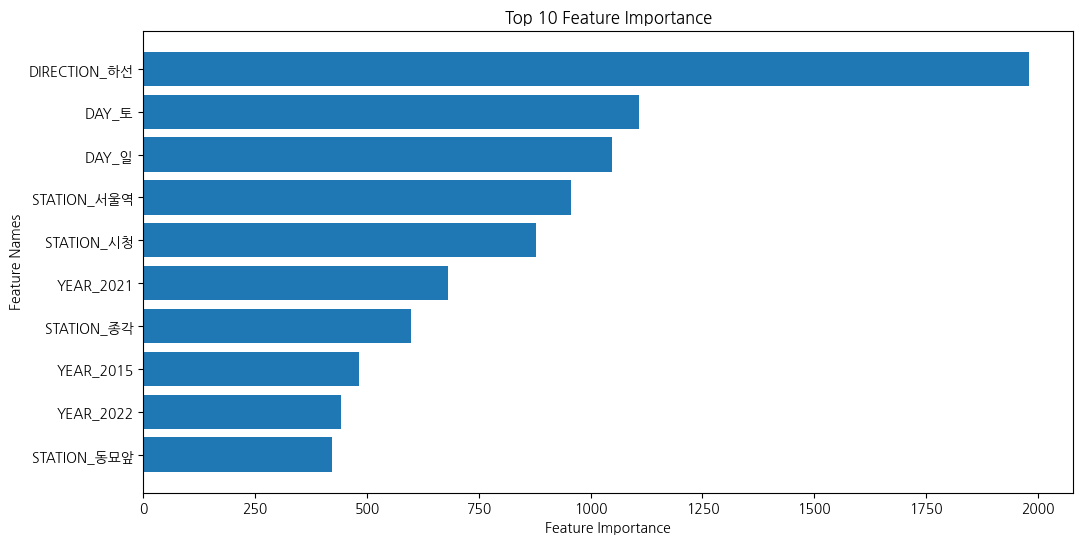

In [ ]:
import lightgbm as lgb
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

# .pkl 파일로부터 파이프라인 객체를 로드합니다.
loaded_pipeline = joblib.load(DATA_PATH + 'LGBMRegressor/LGB_reg_num1.pkl')

# 파이프라인에서 모델을 추출합니다.
loaded_model = loaded_pipeline.named_steps['LGB_reg']

# 모델에서 feature importance를 가져옵니다.
feature_importance = loaded_model.feature_importances_

# OneHot 인코딩을 사용한 경우, 칼럼명을 추출합니다.
column_transformer = loaded_pipeline.named_steps['preprocessor']
onehot_columns = list(column_transformer.named_transformers_['cat'].get_feature_names_out(input_features=['YEAR', 'MONTH', 'DAY', 'STATION', 'DIRECTION', 'TIME_00']))
all_columns = onehot_columns  # OneHot 인코딩 칼럼명

# 특성 중요도와 칼럼명을 연결합니다.
feature_importance_with_names = list(zip(all_columns, feature_importance))

# 특성 중요도를 중요도 값으로 정렬합니다.
feature_importance_with_names.sort(key=lambda x: x[1], reverse=True)

# 상위 N개의 중요한 특성만 선택
top_n = 10  # 상위 10개 특성을 표시하도록 설정
top_features = feature_importance_with_names[:top_n]

# 중요한 특성과 중요도를 시각화합니다.
top_feature_names, top_feature_importance = zip(*top_features)
plt.figure(figsize=(12, 6))
plt.barh(top_feature_names, top_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Top {} Feature Importance'.format(top_n))
plt.gca().invert_yaxis()  # 중요도가 높은 순서대로 표시하기 위해 y-축 뒤집기
plt.show()

In [ ]:
import lightgbm as lgb
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# .pkl 파일로부터 파이프라인 객체를 로드합니다.
loaded_pipeline = joblib.load(DATA_PATH + 'LGBMRegressor/LGB_reg_num1.pkl')

# 파이프라인에서 모델을 추출합니다.
loaded_model = loaded_pipeline.named_steps['LGB_reg']

# 모델에서 feature importance를 가져옵니다.
feature_importance = loaded_model.feature_importance(importance_type='split')

# OneHot 인코딩을 사용한 경우, 칼럼명을 추출합니다.
column_transformer = loaded_pipeline.named_steps['preprocessor']
onehot_columns = list(column_transformer.named_transformers_['cat'].get_feature_names_out(input_features=['YEAR', 'MONTH', 'DAY', 'STATION', 'DIRECTION', 'TIME_00']))
all_columns = onehot_columns  # OneHot 인코딩 칼럼명

# 특성 중요도와 칼럼명을 연결합니다.
feature_importance_with_names = list(zip(all_columns, feature_importance))

# 특성 중요도를 중요도 값으로 정렬합니다.
feature_importance_with_names.sort(key=lambda x: x[1], reverse=True)

# 상위 N개의 중요한 특성만 선택
top_n = 10  # 상위 10개 특성을 표시하도록 설정
top_features = feature_importance_with_names[:top_n]

# 중요한 특성과 중요도를 데이터프레임으로 만듭니다.
import pandas as pd
df = pd.DataFrame(top_features, columns=['Feature', 'Feature Importance'])

# Seaborn을 사용하여 중요한 특성을 가로 막대 그래프로 시각화합니다.
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature Importance', y='Feature', data=df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Top {} Feature Importance'.format(top_n))
plt.gca().invert_yaxis()  # 중요도가 높은 순서대로 표시하기 위해 y-축 뒤집기
plt.show()

## XGBRegressor

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
import joblib
%matplotlib inline

# 저장된 모델 파일을 불러옵니다.
pipeline = joblib.load(DATA_PATH + 'XGBRegressor/XGB_reg_num1.pkl')
model = pipeline.named_steps['XGB_reg']

# 특정 트리 번호를 선택하여 시각화
tree_number = 0  # 원하는 트리 번호 선택

# 시각화
fig, ax = plt.subplots(figsize=(300, 100))
xgb.plot_tree(model, num_trees=tree_number, ax=ax, rankdir='LR')  # 'LR'로 방향 설정
plt.show()

Output hidden; open in https://colab.research.google.com to view.

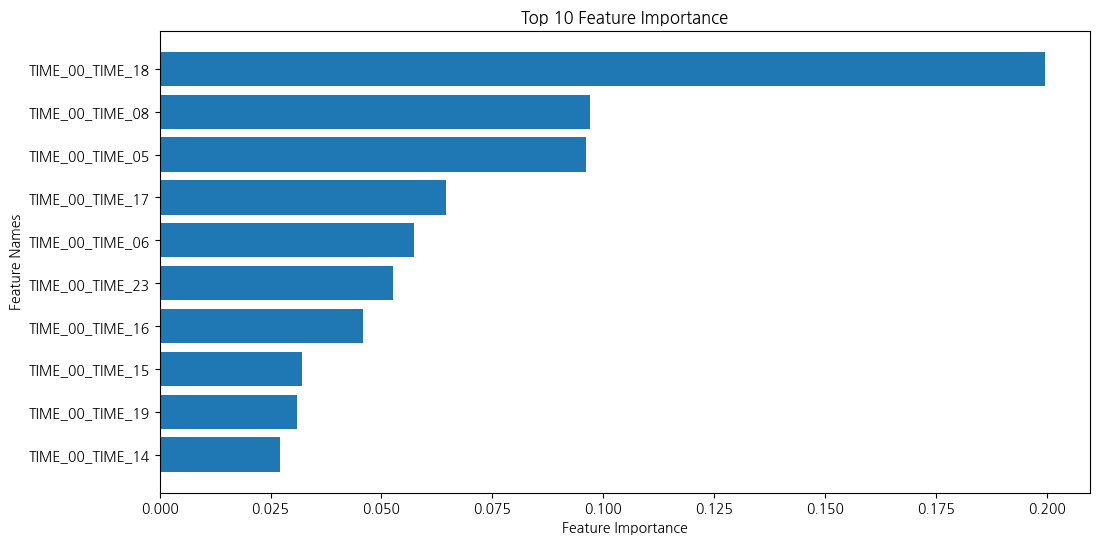

In [ ]:
import xgboost as xgb
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

# .pkl 파일로부터 파이프라인 객체를 로드합니다.
loaded_pipeline = joblib.load(DATA_PATH + 'XGBRegressor/XGB_reg_num1.pkl')

# 파이프라인에서 모델을 추출합니다.
loaded_model = loaded_pipeline.named_steps['XGB_reg']

# 모델에서 feature importance를 가져옵니다.
feature_importance = loaded_model.feature_importances_

# OneHot 인코딩을 사용한 경우, 칼럼명을 추출합니다.
column_transformer = loaded_pipeline.named_steps['preprocessor']
onehot_columns = list(column_transformer.named_transformers_['cat'].get_feature_names_out(input_features=['YEAR', 'MONTH', 'DAY', 'STATION', 'DIRECTION', 'TIME_00']))
all_columns = onehot_columns  # OneHot 인코딩 칼럼명

# 특성 중요도와 칼럼명을 연결합니다.
feature_importance_with_names = list(zip(all_columns, feature_importance))

# 특성 중요도를 중요도 값으로 정렬합니다.
feature_importance_with_names.sort(key=lambda x: x[1], reverse=True)

# 상위 N개의 중요한 특성만 선택
top_n = 10  # 상위 10개 특성을 표시하도록 설정
top_features = feature_importance_with_names[:top_n]

# 중요한 특성과 중요도를 시각화합니다.
top_feature_names, top_feature_importance = zip(*top_features)
plt.figure(figsize=(12, 6))
plt.barh(top_feature_names, top_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Top {} Feature Importance'.format(top_n))
plt.gca().invert_yaxis()  # 중요도가 높은 순서대로 표시하기 위해 y-축 뒤집기
plt.show()

In [ ]:
import xgboost as xgb
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# .pkl 파일로부터 파이프라인 객체를 로드합니다.
loaded_pipeline = joblib.load(DATA_PATH + 'XGBRegressor/XGB_reg_num1.pkl')

# 파이프라인에서 모델을 추출합니다.
loaded_model = loaded_pipeline.named_steps['XGB_reg']

# 모델에서 feature importance를 가져옵니다.
feature_importance = loaded_model.feature_importances_

# OneHot 인코딩을 사용한 경우, 칼럼명을 추출합니다.
column_transformer = loaded_pipeline.named_steps['preprocessor']
onehot_columns = list(column_transformer.named_transformers_['cat'].get_feature_names_out(input_features=['YEAR', 'MONTH', 'DAY', 'STATION', 'DIRECTION', 'TIME_00']))
all_columns = onehot_columns  # OneHot 인코딩 칼럼명

# 특성 중요도와 칼럼명을 연결합니다.
feature_importance_with_names = list(zip(all_columns, feature_importance))

# 특성 중요도를 중요도 값으로 정렬합니다.
feature_importance_with_names.sort(key=lambda x: x[1], reverse=True)

# 상위 N개의 중요한 특성만 선택
top_n = 10  # 상위 10개 특성을 표시하도록 설정
top_features = feature_importance_with_names[:top_n]

# 중요한 특성과 중요도를 데이터프레임으로 만듭니다.
import pandas as pd
df = pd.DataFrame(top_features, columns=['Feature', 'Feature Importance'])

# Seaborn을 사용하여 중요한 특성을 가로 막대 그래프로 시각화합니다.
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature Importance', y='Feature', data=df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Top {} Feature Importance'.format(top_n))
plt.gca().invert_yaxis()  # 중요도가 높은 순서대로 표시하기 위해 y-축 뒤집기
plt.show()